# CSCI 5922 Final Exam

## Part 1: Practice Interview Questions

1)	What is an activation function (in neural networks) and why is it used?  

An activation function is a mathematical operation that is applied to the output of a neuron in a neural network to generate an “activated” output. Because neurons are typically a linear sum-product of weights and input values, they have difficulty approximating non-linear functions, such as the infamous XOR problem. Activation functions are typically non-linear, such as sigmoids or hyberbolic tangents, which give the network the ability to approximate non-linear functions. 

2)	What is an exploding gradient and give an example of what could cause it.

An exploding gradient is a quickly increasing derivative of the loss function with respect to the model parameters. The gradient is used to determine the direction and size of the change of model parameters when performing backpropagation, in tandem with the learning rate. If the gradient is increasing too much, the model will not converge to a minimum. This could occur easily in a recurrent neural network that has long series of inputs because the gradient for some parameters is a function of all prior inputs. If the values in this chain are > 1, their product and thus the gradient can get very large very quickly. 

3)	When using an activation function in a CNN that predicts images, why might you choose the ReLU?

ReLU’s power is in the simplicity of its calculation and of its derivative—for values below 0, the derivative is 0, and for values above 0, the derivate is 1. Furthermore, any negative values are simply reduced to a 0. This is important in a CNN designed to work with images because the input typically has really high dimensionality and thus the model has many layers with many parameters. ReLU helps to keep the derivatives and thus the gradient within reasonable values. 

4)	A transformer (such as for language translation) has an encoder and a decoder. Suppose you have a word that is one-hot encoded. What 4 things will a common encoder include when embedding that word? Hint: The first one is some kind of embedding. What are the other three?

A transformer encoder commonly includes first the embedding of the word into a vector space that captures the meaning of the word. Next, positional encoding is added to capture the location of the word in the input. Next, a self-attention mechanism captures the relative importance of the word in relation to the other words in the input. Finally, normalization and feed forward layers encode all of the above, typically into other encoder blocks.

5)	Define BERT (Bidirectional Encoder Representations from Transformers).

BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained natural language processing model developed by Google. It utilizes a transformer architecture and is trained on vast amounts of text data to learn contextualized representations of words. BERT is bidirectional, meaning it considers both left and right context in a sentence, enabling it to capture richer semantic meanings. It has achieved state-of-the-art results in various NLP tasks by fine-tuning its pre-trained weights on specific downstream tasks.

6)	What is cross attention in a transformer?

Cross-attention is a mechanism by which a transformer model pays varying degrees of attention to different parts of the input sequence when generating the output sequence. Unlike self-attention, which considers relationships within a single sequence, cross-attention involves attending to positions in the input sequence based on the context provided by another sequence.

7)	What is transfer learning?

Transfer learning is a machine learning model training technique that involves pre-training the model on a different but similar dataset to the target task before fine-tuning on the specific task at hand. It is a powerful technique that allows a model to learn on a vast trove of labeled or unlabeled data before attempting a task that might have much less data. 

8)	Define GAN (Generative adversarial network)?

A GAN is a type of neural network model that learns from the competing aims of a generator and a discrimator. The discriminator is attempting to learn to distinguish between a real input and a fake one, while the generator simultaneously learns to create fake inputs that are indistinguishable from real ones. They achieved impressive results in the field of generative AI. 

9)	Define GPT.

GPT stands for Generative Pre-Trained Transformer. It refers to the family of language models based on transformers that are pre-trained on massive amounts of diverse text data in order to learn contextualized representations of words. The generative part refers to the fact that after these models are prompted with input, they generate a bunch of coherent and contextually relevant text. 

10)	Define ChatGPT.

ChatGPT is a software product created by OpenAI in late 2022 that brought a lot of joy to students and a lot of headaches for teachers accustomed to assigning boring, rote assignments. Why? Well, based on the GPT defined above, OpenAI made it possible for anyone with an internet connection to prompt their large language model GPT3.5 and get a coherent response. ChatGPT has since passed the bar exam, med school exams, and written likely millions of high school English essays across the world.  If ChatGPT can answer this question, does that make it self aware?

11)	Common activation functions include ReLU, sigmoid, tanh, and softmax (among others). Give an example when you would use the sigmoid as the last activation function in a NN. Give an example when you would use softmax as the last activation function in a NN. 

Sigmoid is a very useful activation function that is excellent for binary classification. Because it’s shape, it normalizes the input value to between 0 and 1 and for most real numbers, the value is very close to 1 or 0. The softmax function is similarly useful for classification, but instead for multiclass problems. It takes a whole range of input weights and normalizes them such that they are all between 0 and 1 and add up to one, making the outputs interpretable as probabilities that the input belongs to a given class.

12)	Suppose you have labeled input data where the labels are one-hot encoded. Suppose also that your labels can be one of three categories (like dog, cat, mouse for example). Next, suppose the last activation function of your NN is the softmax. Which Loss function would you choose to use in this case and why?	

For this case, I would most certainly use categorical cross entropy because this is a classification problem with more than 2 classes. CCE rewards a model not just for guessing the correct category, but it also rewards guessing correctly with high confidence. It therefore performs excellently at training the model progressively, helping the model get slowly more and more confident as it trains. 

13)	Why use max pooling CNNs – what does max pooling do?

Max pooling is a type of layer whose primary purpose is to reduce the dimensionality of the features in a model.  It does this by defining a pool, or patch, of a given size (say 3 by 3) and pulling out the maximum value from within that pool. This simplifies the input (in our case 9 values) down to just a single value that still captures a lot of the important signal. It’s commonly used with images which have notoriously high dimensionality to get us from millions of pixels down to feature space of just a few thousand categories.


## Part 2: ANN & CNN Architectures

### Question 1A: ANN Diagram

![ANN Diagram](ann_diagram.png)

### Question 1B: ANN Derivatives  
  
#### Equations for ANN:  
Z1 = X * W1 + B  
H1 = σ(Z1)  
Z2 = H1 * W2 + C  
H2 = ReLU(Z2)
Z3 = H2 * W3 + D  
ŷ = softmax(Z3)  
L = CCE(y, ŷ)  
L = -y * log(ŷ)  
  
#### Derviative ∂L/∂W2_11:
  
∂L/∂W2_11 = ∂L/∂ŷ * ∂ŷ/∂Z3 * ∂Z3/∂ZH2 * ∂H2/∂Z2 * ∂Z2/∂W2_11  
  
∂L/∂ŷ = -y/ŷ  
∂ŷ/∂Z3 = ŷ * (1 - ŷ)  
∂Z3/∂H2 = W3
∂H2/∂Z2 = 1 if Z2 > 0 else 0  
∂Z2/∂W2_11 = H1  
  
if Z2 > 0:  
∂L/∂W2_11 = -y/ŷ * ŷ * (1 - ŷ) * W3 * 1 * H1  
∂L/∂W2_11 = -y * (1 - ŷ) * W3 * H1  
  
if Z2 <= 0:  
∂L/∂W2_11 = -y/ŷ * ŷ * (1 - ŷ) * W3 * 0 * H1  
∂L/∂W2_11 = 0  




In [1]:
# Create this ANN in Keras

# import tensorflow
import tensorflow as tf

# create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


2023-12-09 16:44:23.398488: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Question 2A: CNN Diagram

![CNN Diagram](cnn_diagram.png)

In [2]:
# Create the CNN in Keras

# import tensorflow
import tensorflow as tf

# create the model
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=2, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(30, 30, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

# compile the model
cnn.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

# print the model summary
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 2)         20        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 2)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 4)         76        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 196)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                12608     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                

## Part 3: Applying Neural Nets (ANN, CNN, LSTM) on Real Labeled Data

### Pull in the Data, Normalize, and Split into Train and Test Sets

In [101]:
# import libraries
import pandas as pd

# import the data
df = pd.read_csv('Final_News_DF_Labeled_ExamDataset.csv')
print('The shape of the original dataframe is: ', df.shape)
df_shuffled = df.sample(frac=1, replace=False).reset_index(drop=True)
print('The head of the shuffled dataframe labels is: ', df_shuffled['LABEL'].head())

# pull out the label
y = df_shuffled['LABEL']
x = df_shuffled.drop(['LABEL'], axis=1)
print('Shape of x:', x.shape)  
print('Shape of y:', y.shape)

# scale x
x_max = x.max()
x_min = x.min()
x = (x - x_min) / (x_max - x_min)
print('The first row of scaled x is: ', x[:1])

# split the data into train and test
ratio = 0.8
split = int(ratio * len(x))
x_train = x[:split]
x_test = x[split:]
y_train = y[:split]
y_test = y[split:]

# one hot encode the labels
y_train = pd.get_dummies(y_train, dtype=int)
y_test = pd.get_dummies(y_test, dtype=int)
print(y_train.head())

# convert the dataframes to numpy arrays
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print('Shape of x_train:', x_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

# check for any null values
print('Null values in x_train:', np.isnan(x_train).sum())
print('Null values in x_test:', np.isnan(x_test).sum())
print('Null values in y_train:', np.isnan(y_train).sum())
print('Null values in y_test:', np.isnan(y_test).sum())

# check for any values that are higher than  1
print('Non-binary values in y_train:', np.where(y_train > 1))
print('Non-binary values in y_test:', np.where(y_test > 1))
print('Non-binary values in x_train:', np.where(x_train > 1))
print('Non-binary values in x_test:', np.where(x_test > 1))


The shape of the original dataframe is:  (1493, 301)
The head of the shuffled dataframe labels is:  0    politics
1    football
2     science
3    politics
4    football
Name: LABEL, dtype: object
Shape of x: (1493, 300)
Shape of y: (1493,)
The first row of scaled x is:     according  agency  ahead  alabama  amazon  america  american  announced  \
0        0.0     0.0    0.0      0.0     0.0      0.0       0.0        0.0   

   appeared  apple  ...  wolverines  women  work  working  world  wrote  year  \
0       0.0    0.0  ...         0.0    0.0   0.0      0.0    0.5    0.0   0.0   

   years  york  young  
0    0.0   0.0    0.0  

[1 rows x 300 columns]
   football  politics  science
0         0         1        0
1         1         0        0
2         0         0        1
3         0         1        0
4         1         0        0
Shape of x_train: (1194, 300)
Shape of x_test: (299, 300)
Shape of y_train: (1194, 3)
Shape of y_test: (299, 3)
Null values in x_train: 0
Null values 

### Create and Train and ANN for the Data

In [71]:
# create an ANN in Keras
import tensorflow as tf

# clear backend
tf.keras.backend.clear_session()

# create the model
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(300,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compile the model
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# print the model summary
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                3010      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 3,083
Trainable params: 3,083
Non-trainable params: 0
_________________________________________________________________


In [72]:
# set hyperparameters
batch_size_ann = 100
epochs_ann = 80

# train the model
history_ann = ann.fit(
    x_train, 
    y_train, 
    epochs=epochs_ann, 
    batch_size=batch_size_ann, 
    validation_data=(x_test, y_test)
)

Epoch 1/80
12/12 [==============================] - 0s 13ms/step - loss: 1.1656 - accuracy: 0.3308 - val_loss: 1.1385 - val_accuracy: 0.3043
Epoch 2/80
12/12 [==============================] - 0s 3ms/step - loss: 1.1617 - accuracy: 0.3392 - val_loss: 1.1243 - val_accuracy: 0.3043
Epoch 3/80
12/12 [==============================] - 0s 4ms/step - loss: 1.1475 - accuracy: 0.3266 - val_loss: 1.1134 - val_accuracy: 0.3043
Epoch 4/80
12/12 [==============================] - 0s 3ms/step - loss: 1.1309 - accuracy: 0.3593 - val_loss: 1.1061 - val_accuracy: 0.3211
Epoch 5/80
12/12 [==============================] - 0s 3ms/step - loss: 1.1345 - accuracy: 0.3593 - val_loss: 1.1003 - val_accuracy: 0.3378
Epoch 6/80
12/12 [==============================] - 0s 3ms/step - loss: 1.1177 - accuracy: 0.3610 - val_loss: 1.0957 - val_accuracy: 0.4482
Epoch 7/80
12/12 [==============================] - 0s 3ms/step - loss: 1.1231 - accuracy: 0.3601 - val_loss: 1.0919 - val_accuracy: 0.4548
Epoch 8/80
12/12 [=

### Evaluate the ANN

The accuracy of the ANN on the test set is: 0.7324414849281311


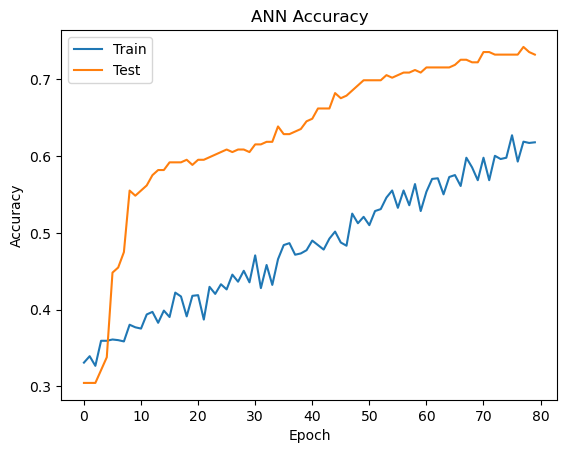

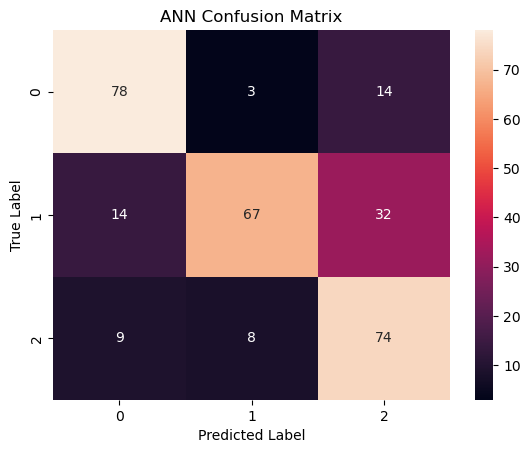

In [75]:
# print the accuracy of the model
print('The accuracy of the ANN on the test set is:', history_ann.history['val_accuracy'][-1])

# plot the accuracy by epoch during training
import matplotlib.pyplot as plt
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title('ANN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# run predictions on the test set
predictions_ann = ann.predict(x_test)


# create a confusion matrix of the predictions and plot it
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
y_pred_ann = np.argmax(predictions_ann, axis=1)
y_eval_ann = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_eval_ann, y_pred_ann)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [77]:
# save the model
ann.save('ann_model.keras')

### Create and Train a CNN for the Data

In [76]:
# create the CNN in Keras
import tensorflow as tf

# create the model
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=5, kernel_size=3, strides=1, activation='relu', padding='same', input_shape=(300,1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=15, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

# compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# print the model summary
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 300, 5)            20        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 150, 5)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 150, 15)           240       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 75, 15)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1125)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1125)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [78]:
# set hyperparameters
batch_size_cnn = 100
epochs_cnn = 80

# reshape input data
x_train_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print('Shape of x_train_cnn:', x_train_cnn.shape)
print('Shape of x_test_cnn:', x_test_cnn.shape)

# train the cnn
history_cnn = cnn.fit(
    x_train_cnn, 
    # x_train, 
    y_train, 
    epochs=epochs_cnn, 
    batch_size=batch_size_cnn, 
    validation_data=(x_test_cnn, y_test)
    # validation_data=(x_test, y_test)
)

Shape of x_train_cnn: (1194, 300, 1)
Shape of x_test_cnn: (299, 300, 1)
Epoch 1/80
12/12 [==============================] - 1s 24ms/step - loss: 1.5599 - accuracy: 0.3392 - val_loss: 1.5070 - val_accuracy: 0.3177
Epoch 2/80
12/12 [==============================] - 0s 13ms/step - loss: 1.3827 - accuracy: 0.3384 - val_loss: 1.2846 - val_accuracy: 0.3177
Epoch 3/80
12/12 [==============================] - 0s 11ms/step - loss: 1.1860 - accuracy: 0.3392 - val_loss: 1.1204 - val_accuracy: 0.3177
Epoch 4/80
12/12 [==============================] - 0s 11ms/step - loss: 1.1019 - accuracy: 0.3769 - val_loss: 1.0928 - val_accuracy: 0.3913
Epoch 5/80
12/12 [==============================] - 0s 11ms/step - loss: 1.0908 - accuracy: 0.3626 - val_loss: 1.0877 - val_accuracy: 0.3913
Epoch 6/80
12/12 [==============================] - 0s 11ms/step - loss: 1.0888 - accuracy: 0.3735 - val_loss: 1.0845 - val_accuracy: 0.3579
Epoch 7/80
12/12 [==============================] - 0s 11ms/step - loss: 1.0814 - 

### Evaluate the CNN

The accuracy of the CNN on the test set is: 0.7056856155395508


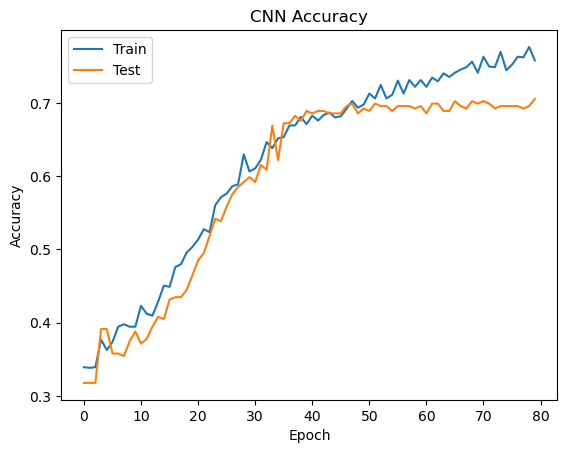

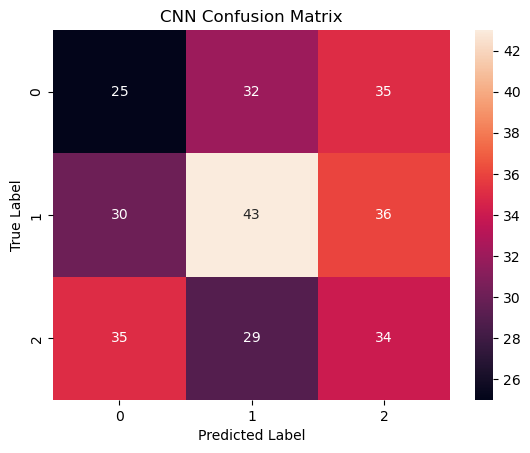

In [119]:
# print the accuracy of the model
print('The accuracy of the CNN on the test set is:', history_cnn.history['val_accuracy'][-1])

# plot the accuracy by epoch during training
import matplotlib.pyplot as plt
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# run predictions on the test set
predictions_cnn = cnn.predict(x_test_cnn)

# create a confusion matrix of the predictions and plot it
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
y_pred_cnn = np.argmax(predictions_cnn, axis=1)
y_eval_cnn = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_eval_cnn, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [80]:
# save the model
cnn.save('cnn_model.keras')


### Create and Train an LSTM for the Data


In [117]:
# create the CNN in Keras
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# create the model
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=40, return_sequences=True, input_shape=(300,1)),
    tf.keras.layers.LSTM(units=20, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

# compile the model
lstm.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# print the model summary
lstm.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 300, 40)           6720      
_________________________________________________________________
lstm_25 (LSTM)               (None, 20)                4880      
_________________________________________________________________
dropout_23 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 63        
Total params: 11,663
Trainable params: 11,663
Non-trainable params: 0
_________________________________________________________________


In [118]:
# set the hyperparameters
batch_size_lstm = 100
epochs_lstm = 80

# reshape input data for lstm
x_train_lstm = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_lstm = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print('Shape of x_train_lstm:', x_train_lstm.shape)
print('Shape of x_test_lstm:', x_test_lstm.shape)

# train the lstm
history_lstm = lstm.fit(
    x_train_lstm, 
    y_train, 
    epochs=epochs_lstm, 
    batch_size=batch_size_lstm, 
    validation_data=(x_test_lstm, y_test)
)


Shape of x_train_lstm: (1194, 300, 1)
Shape of x_test_lstm: (299, 300, 1)
Epoch 1/80
12/12 [==============================] - 7s 379ms/step - loss: 1.0988 - accuracy: 0.3308 - val_loss: 1.0995 - val_accuracy: 0.3344
Epoch 2/80
12/12 [==============================] - 4s 315ms/step - loss: 1.0981 - accuracy: 0.3492 - val_loss: 1.0983 - val_accuracy: 0.3311
Epoch 3/80
12/12 [==============================] - 4s 303ms/step - loss: 1.0978 - accuracy: 0.3451 - val_loss: 1.0973 - val_accuracy: 0.3411
Epoch 4/80
12/12 [==============================] - 3s 290ms/step - loss: 1.0964 - accuracy: 0.3827 - val_loss: 1.0927 - val_accuracy: 0.3913
Epoch 5/80
12/12 [==============================] - 3s 287ms/step - loss: 1.0897 - accuracy: 0.3894 - val_loss: 1.0843 - val_accuracy: 0.3579
Epoch 6/80
12/12 [==============================] - 3s 270ms/step - loss: 1.0859 - accuracy: 0.3811 - val_loss: 1.0759 - val_accuracy: 0.4415
Epoch 7/80
12/12 [==============================] - 3s 286ms/step - loss: 

### Evaluate the LSTM

The accuracy of the LSTM on the test set is: 0.5150501728057861


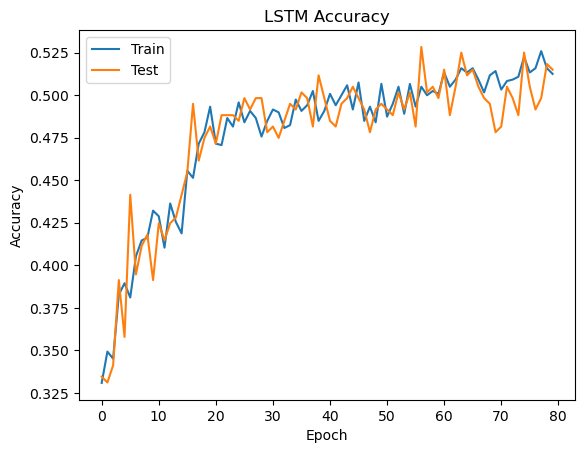

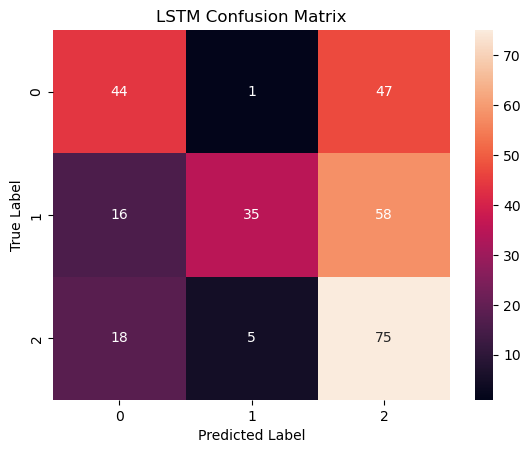

In [121]:
# print the accuracy of the model
print('The accuracy of the LSTM on the test set is:', history_lstm.history['val_accuracy'][-1])

# plot the accuracy by epoch during training
import matplotlib.pyplot as plt
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# run predictions on the test set
predictions_lstm = lstm.predict(x_test_lstm)

# create a confusion matrix of the predictions and plot it
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
y_pred_lstm = np.argmax(predictions_lstm, axis=1)
y_eval_lstm = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_eval_lstm, y_pred_lstm)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [120]:
# save the LSTM model
lstm.save('lstm_model.keras')

## Export to HTML

In [122]:
# export to HTML for webpage
import os

# os.system('jupyter nbconvert --to html mod1.ipynb')
os.system('jupyter nbconvert --to html final.ipynb --HTMLExporter.theme=dark')

[NbConvertApp] Converting notebook final.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 613270 bytes to final.html


0